In [2]:
import numpy as np               # For number manipulation
import pandas as pd              # For importing data to a DataFrame
import matplotlib.pyplot as plt  # For plotting graphs
plt.rcParams["figure.figsize"] = (10,10)
import math

from sklearn import preprocessing                     # To convert string columns to numeric for numeric analysis
#from sklearn.linear_model import LinearRegression     # A ML Model/Algorithm  
#from sklearn.linear_model import LogisticRegression   # A ML Model/Algorithm  
from sklearn.neighbors import KNeighborsClassifier    # A ML Model/Algorithm  

from sklearn.model_selection import train_test_split  # For the Hold-out method
from sklearn.tree import DecisionTreeClassifier       # A ML Model/Algorithm  
from sklearn.naive_bayes import GaussianNB            # A ML Model/Algorithm 
from sklearn.cluster import KMeans                    # A ML Model/Algorithm 



Raw Data

                     Model  Year  Kilometers Fuel_Type  Price
0     Honda Accord 2.4 AT  2009      101867   Petrol    2900
1     Honda Accord 2.4 AT  2009       97241   Petrol    3000
2     Honda Accord 2.4 AT  2009       64533   Petrol    3200
3     Honda Accord 2.4 AT  2009       63000   Petrol    3300
4     Honda Accord 2.4 AT  2010      100000   Petrol    3100
..                    ...   ...         ...       ...    ...
977  Honda WR-V i-VTEC VX  2019       28000   Petrol    8650
978  Honda WR-V i-VTEC VX  2020       15000   Petrol    9250
979  Honda WR-V i-VTEC VX  2021       30000   Petrol    9500
980  Honda WR-V i-VTEC VX  2021       16748   Petrol    8140
981  Honda WR-V i-VTEC VX  2022       10000   Petrol   10440

[982 rows x 5 columns]
              Year     Kilometers         Price
count   982.000000     982.000000    982.000000
mean   2014.769857   64732.007128   5522.912424
std       3.624583   39699.522031   2924.092734
min    2004.000000    1425.000000   100

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

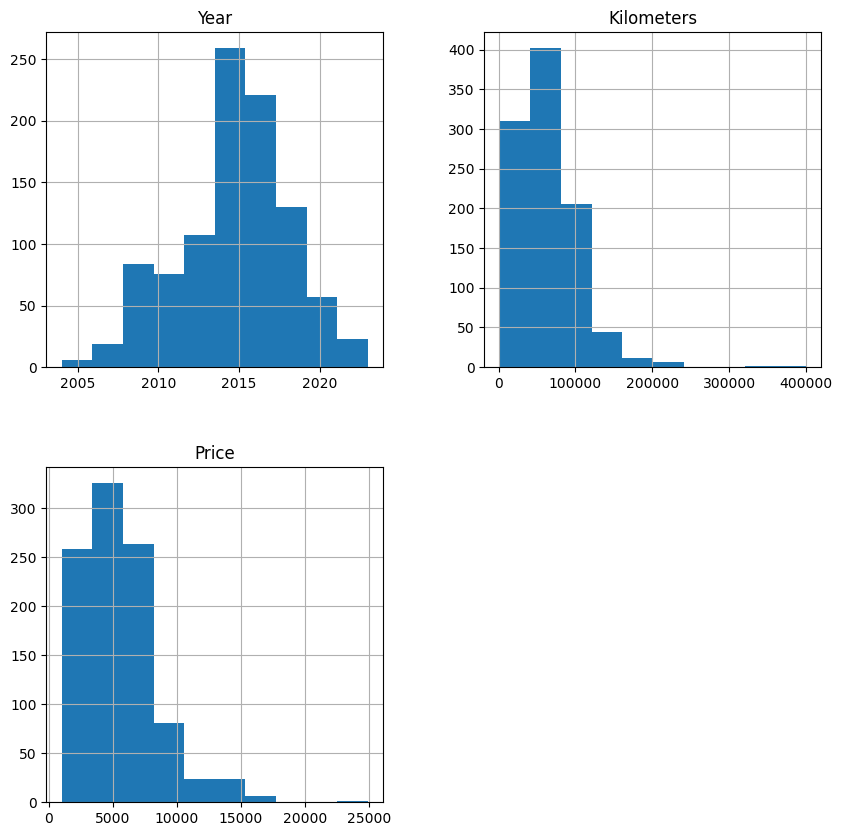

In [3]:
data = pd.read_csv("honda.csv")  # Read the Honda file into a DataFrame
print("\n\nRaw Data\n\n",data)   # Print the honda dataframe
print(data.describe())           # Describe the dataframe numereic columns
data.hist()                      # Generate histograms from the numeric columns  

In [4]:
# As we have text columns in the data and the algorithms perform best with numeric data, we do a transformation
# of the text columns into numeric values.  
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# apply to a single column
data['Model'] = labelencoder.fit_transform(data['Model'])
data['Fuel_Type'] = labelencoder.fit_transform(data['Fuel_Type'])

data.head()

,Model,Year,Kilometers,Fuel_Type,Price
0,0,2009,101867,1,2900
1,0,2009,97241,1,3000
2,0,2009,64533,1,3200
3,0,2009,63000,1,3300
4,0,2010,100000,1,3100


In [5]:
data.tail(2)

,Model,Year,Kilometers,Fuel_Type,Price
980,24,2021,16748,1,8140
981,24,2022,10000,1,10440


In [6]:
array = data.values
predictors = array[:,0:4] # Use all the rows, but only the 1st 4 columns, for to base your predictions
# Model, Year, Kilometers and Fuel_Tuype

targets = array[:,4]  # This is the column you are trying to predict, all the rows, the 5th column, Price, (index 4)

In [23]:
#1st Algorithm - K Nearest Neighbour
neighbours = 7 # How many neighbors to check
distance_calculation_euclidean_method = 2
model = KNeighborsClassifier(n_neighbors = neighbours, p=distance_calculation_euclidean_method) 
# p tells us how to calculate the distance, euclidean in this case (2)

# Fit the model, these rows become the neighbors
model.fit(predictors, targets)

accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)
print("Accuracy = ", accuracy, "%")

Accuracy =  20.57 %


In [8]:
print("\nGive it a list with just 2 value rows in it")

row3 = [0, 2009, 64533, 1]  # See the 3rd line of preprocessed data above.  
row982 = [24, 2022, 10000, 1]  # See the last line of preprocessed data above.  


Give it a list with just 2 value rows in it


In [9]:
unseens = [row3, row982]  
results = model.predict(unseens) # The results are the last column, Price

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2009, 64533, 1]
Result1 : 1750

Unseen2 : [24, 2022, 10000, 1]
Result2 : 6500


In [10]:
print("\nGive it a list with absolutly unseen data in it")
# A car, similar to the line 3, but 2 years younger and one third the mileage
row_unseen1 =[0, 2011, 21511, 1]

# A car, similar to the last line, but 2 years older and triple the mileage
row_unseen2 =[24, 2020, 30000, 1]

unseens = [row_unseen1, row_unseen2]

results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])


Give it a list with absolutly unseen data in it
Unseen1 : [0, 2011, 21511, 1]
Result1 : 5500

Unseen2 : [24, 2020, 30000, 1]
Result2 : 6750


In [24]:
#2nd Algorithm -  Decision Tree (DecisionTreeClassifer)
model = DecisionTreeClassifier()

# like: model.fit(X, Y) from last week, fitting the model.
model.fit(predictors, targets)

# We are testing the model on the full data set, not ideal but what ya gonna do.
accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 97.25 %


In [12]:
print("\nGive it a list with just 2 value rows in it") 
seens = [row3, row982]  
results = model.predict(seens) # The results are the last column, Has/Hasn't Diabetes

print("Seen1 :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2 :", seens[1])
print("Result2 :", results[1])


Give it a list with just 2 value rows in it
Seen1 : [0, 2009, 64533, 1]
Result1 : 3200

Seen2 : [24, 2022, 10000, 1]
Result2 : 10440


In [13]:
print("\nGive it a list with absolutly unseen data in it")
# A car, similar to the line 3, but 2 years younger and one third the mileage
row_unseen1 =[0, 2015, 36666, 0]

# A car, similar to the last line, but 2 years older and triple the mileage
row_unseen2 =[24, 2020, 30000, 1]

unseens = [row_unseen1, row_unseen2]

results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])


Give it a list with absolutly unseen data in it
Unseen1 : [0, 2015, 36666, 0]
Result1 : 3300

Unseen2 : [24, 2020, 30000, 1]
Result2 : 9500


In [25]:
#3rd Algorithm - Bayesian (GaussianNB)
model = GaussianNB()

# like: model.fit(X, Y) from last week, fitting the model.
model.fit(predictors, targets)

# We are testing the model on the full data set, not ideal but what ya gonna do.
accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 25.56 %


In [15]:
results = model.predict(seens)

print("Seen1   :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2   :", seens[1])
print("Result2 :", results[1])

Seen1   : [0, 2009, 64533, 1]
Result1 : 3300

Seen2   : [24, 2022, 10000, 1]
Result2 : 10440


In [16]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2015, 36666, 0]
Result1 : 4650

Unseen2 : [24, 2020, 30000, 1]
Result2 : 9200


In [26]:
#4th Algorithm - Clustering (KMeans)
model = KMeans(algorithm='auto', copy_x=True,  init='k-means++', max_iter=600, 
               n_clusters=2, # You want cluster the data into 2 clusters, not a good fit, expect rubbish
               n_init=10) 

# like: model.fit(X, Y) from last week, fitting the model.
model.fit(predictors, targets)

# We are testing the model on the full data set, not ideal but what ya gonna do.
accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Accuracy = -64982185396056.43 %


In [18]:
results = model.predict(seens) 
print("Results = ", results, "\n")

print("Seen1   :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2   :", seens[1])
print("Result2 :", results[1])

Results =  [1 1] 

Seen1   : [0, 2009, 64533, 1]
Result1 : 1

Seen2   : [24, 2022, 10000, 1]
Result2 : 1


In [19]:
results = model.predict(unseens) 
print("Results = ", results, "\n")#

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Results =  [1 1] 

Unseen1 : [0, 2015, 36666, 0]
Result1 : 1

Unseen2 : [24, 2020, 30000, 1]
Result2 : 1


In [27]:
#Q2 a
import numpy as np               # For number manipulation
import pandas as pd              # For importing data to a DataFrame
import matplotlib.pyplot as plt  # For plotting graphs
plt.rcParams["figure.figsize"] = (10,10)
import math

from sklearn import preprocessing                     # To convert string columns to numeric for numeric analysis
#from sklearn.linear_model import LinearRegression     # A ML Model/Algorithm  
#from sklearn.linear_model import LogisticRegression   # A ML Model/Algorithm  
from sklearn.neighbors import KNeighborsClassifier    # A ML Model/Algorithm  

from sklearn.model_selection import train_test_split  # For the Hold-out method
from sklearn.tree import DecisionTreeClassifier       # A ML Model/Algorithm  
from sklearn.naive_bayes import GaussianNB            # A ML Model/Algorithm 
from sklearn.cluster import KMeans                    # A ML Model/Algorithm 



Raw Data

       6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]
                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%   

array([[<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'148'}>,
        <AxesSubplot:title={'center':'72'}>],
       [<AxesSubplot:title={'center':'35'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'33.6'}>],
       [<AxesSubplot:title={'center':'0.627'}>,
        <AxesSubplot:title={'center':'50'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

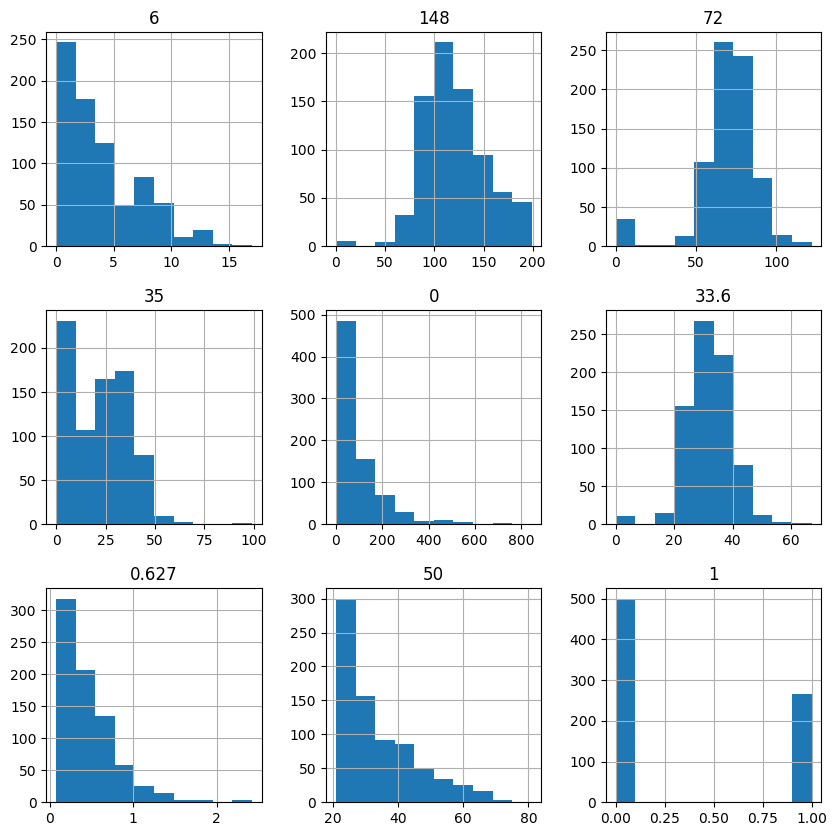

In [32]:
data = pd.read_csv("pima-indians-diabetes-MP.csv") 
print("\n\nRaw Data\n\n",data)   
print(data.describe())            
data.hist()  

In [36]:
fileName = 'pima-indians-diabetes-MP.csv'
colNames = [
    'pregnancies',
    'plasma-glucose',
    'blood-pressure',
    'tricep-skin-fold',
    'insulin-test',
    'body-mass-index',
    'diabetes-pedigree-func',
    'age',
    'outcome'
]

data = pd.read_csv(fileName, names=colNames) # Read the Pima file into a DataFrame
print("Head")
print(data.head())               
print("\n\nTail")
print(data.tail()) 

Head
   pregnancies  plasma-glucose  blood-pressure  tricep-skin-fold  \
0            6             148              72                35   
1            1              85              66                29   
2            8             183              64                 0   
3            1              89              66                23   
4            0             137              40                35   

   insulin-test  body-mass-index  diabetes-pedigree-func  age  outcome  
0             0             33.6                   0.627   50        1  
1             0             26.6                   0.351   31        0  
2             0             23.3                   0.672   32        1  
3            94             28.1                   0.167   21        0  
4           168             43.1                   2.288   33        1  


Tail
     pregnancies  plasma-glucose  blood-pressure  tricep-skin-fold  \
763           10             101              76                48   
7

In [38]:
# As we have text columns in the data and the algorithms perform best with numeric data, we do a transformation
# of the text columns into numeric values.  
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# apply to a single column
data['pregnancies'] = labelencoder.fit_transform(data['pregnancies'])
data['blood-pressure'] = labelencoder.fit_transform(data['blood-pressure'])

data.head()

,pregnancies,plasma-glucose,blood-pressure,tricep-skin-fold,insulin-test,body-mass-index,diabetes-pedigree-func,age,outcome
0,6,148,22,35,0,33.6,0.627,50,1
1,1,85,19,29,0,26.6,0.351,31,0
2,8,183,17,0,0,23.3,0.672,32,1
3,1,89,19,23,94,28.1,0.167,21,0
4,0,137,4,35,168,43.1,2.288,33,1


In [39]:
data.tail(2)

,pregnancies,plasma-glucose,blood-pressure,tricep-skin-fold,insulin-test,body-mass-index,diabetes-pedigree-func,age,outcome
766,1,126,14,0,0,30.1,0.349,47,1
767,1,93,21,31,0,30.4,0.315,23,0


In [40]:
array = data.values
predictors = array[:,0:4] # Use all the rows, but only the 1st 4 columns, for to base your predictions
# Model, Year, Kilometers and Fuel_Tuype

targets = array[:,4]  # This is the column you are trying to predict, all the rows, the 5th column, Price, (index 4)

In [41]:
#1st Algorithm - K Nearest Neighbour
neighbours = 7 # How many neighbors to check
distance_calculation_euclidean_method = 2
model = KNeighborsClassifier(n_neighbors = neighbours, p=distance_calculation_euclidean_method) 
# p tells us how to calculate the distance, euclidean in this case (2)

# Fit the model, these rows become the neighbors
model.fit(predictors, targets)

accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)
print("Accuracy = ", accuracy, "%")

Accuracy =  50.78 %


In [44]:
unseens = [row3, row982]  
results = model.predict(unseens) # The results are the last column, Price

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2009, 64533, 1]
Result1 : 231.0

Unseen2 : [24, 2022, 10000, 1]
Result2 : 231.0


In [45]:
print("\nGive it a list with absolutly unseen data in it")
# A car, similar to the line 3, but 2 years younger and one third the mileage
row_unseen1 =[0, 2011, 21511, 1]

# A car, similar to the last line, but 2 years older and triple the mileage
row_unseen2 =[24, 2020, 30000, 1]

unseens = [row_unseen1, row_unseen2]

results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])


Give it a list with absolutly unseen data in it
Unseen1 : [0, 2011, 21511, 1]
Result1 : 231.0

Unseen2 : [24, 2020, 30000, 1]
Result2 : 231.0


In [42]:
#2nd Algorithm - Decision Tree (DecisionTreeClassifer)
model = DecisionTreeClassifier()

# like: model.fit(X, Y) from last week, fitting the model.
model.fit(predictors, targets)

# We are testing the model on the full data set, not ideal but what ya gonna do.
accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 100.0 %


In [46]:
print("\nGive it a list with just 2 value rows in it") 
seens = [row3, row982]  
results = model.predict(seens) # The results are the last column, Has/Hasn't Diabetes

print("Seen1 :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2 :", seens[1])
print("Result2 :", results[1])


Give it a list with just 2 value rows in it
Seen1 : [0, 2009, 64533, 1]
Result1 : 231.0

Seen2 : [24, 2022, 10000, 1]
Result2 : 231.0


In [48]:
print("\nGive it a list with absolutly unseen data in it")
# A car, similar to the line 3, but 2 years younger and one third the mileage
row_unseen1 =[0, 2015, 36666, 0]

# A car, similar to the last line, but 2 years older and triple the mileage
row_unseen2 =[24, 2020, 30000, 1]

unseens = [row_unseen1, row_unseen2]

results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])


Give it a list with absolutly unseen data in it
Unseen1 : [0, 2015, 36666, 0]
Result1 : 231.0

Unseen2 : [24, 2020, 30000, 1]
Result2 : 231.0


In [43]:
#3rd Algorithm - Bayesian (GaussianNB)
model = GaussianNB()

# like: model.fit(X, Y) from last week, fitting the model.
model.fit(predictors, targets)

# We are testing the model on the full data set, not ideal but what ya gonna do.
accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

Accuracy = 52.6 %


In [49]:
results = model.predict(seens)

print("Seen1   :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2   :", seens[1])
print("Result2 :", results[1])


Seen1   : [0, 2009, 64533, 1]
Result1 : 231.0

Seen2   : [24, 2022, 10000, 1]
Result2 : 231.0


In [50]:
results = model.predict(unseens)

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Unseen1 : [0, 2015, 36666, 0]
Result1 : 231.0

Unseen2 : [24, 2020, 30000, 1]
Result2 : 231.0


In [51]:
#4th Algorithm - Clustering (KMeans)
model = KMeans(algorithm='auto', copy_x=True,  init='k-means++', max_iter=600, 
               n_clusters=2, # You want cluster the data into 2 clusters, not a good fit, expect rubbish
               n_init=10) 

# like: model.fit(X, Y) from last week, fitting the model.
model.fit(predictors, targets)

# We are testing the model on the full data set, not ideal but what ya gonna do.
accuracy = model.score(predictors, targets)
accuracy = round(accuracy * 100, 2)

print("Accuracy =", accuracy, "%")

/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Accuracy = -54086183.02 %


In [55]:
#Q2 part b
results = model.predict(seens) 
print("Results = ", results, "\n")

print("Seen1   :", seens[0])
print("Result1 :", results[0])
print()

print("Seen2   :", seens[1])
print("Result2 :", results[1])

Results =  [1 1] 

Seen1   : [0, 2009, 64533, 1]
Result1 : 1

Seen2   : [24, 2022, 10000, 1]
Result2 : 1


In [54]:
#Q2 part c
results = model.predict(unseens) 
print("Results = ", results, "\n")#

print("Unseen1 :", unseens[0])
print("Result1 :", results[0])
print()

print("Unseen2 :", unseens[1])
print("Result2 :", results[1])

Results =  [1 1] 

Unseen1 : [0, 2015, 36666, 0]
Result1 : 1

Unseen2 : [24, 2020, 30000, 1]
Result2 : 1
